In [1]:
import sys
sys.path.append("..") # to find map_projection.py

import map_projection as mp
import datetime
import matplotlib.pyplot as plt
import astropy.units as u
from nustar_pysolar import planning, io

Issues with nustar_pysolar and conda? Just copy & paste the nustar_pysolar folder in the nust_pysolar folder into your conda environment path then manually install Python's wget via ```conda install -n environmentName conda-forge::python-wget```

In [2]:
# NuSTAR FOV anti-clockwise rotation from solar north in degrees (Det0 in top left originally)
nu_SNangle = 0 

# Nov 21

**021-11-21 1400  to  2021-11-22 0300**

**Orbits**

2021/325  2255  to  2357

2021/326  0031  to  0133

2021/326  0208  to  0310

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia20211118_154800_0094.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Got STEREO-A map.
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


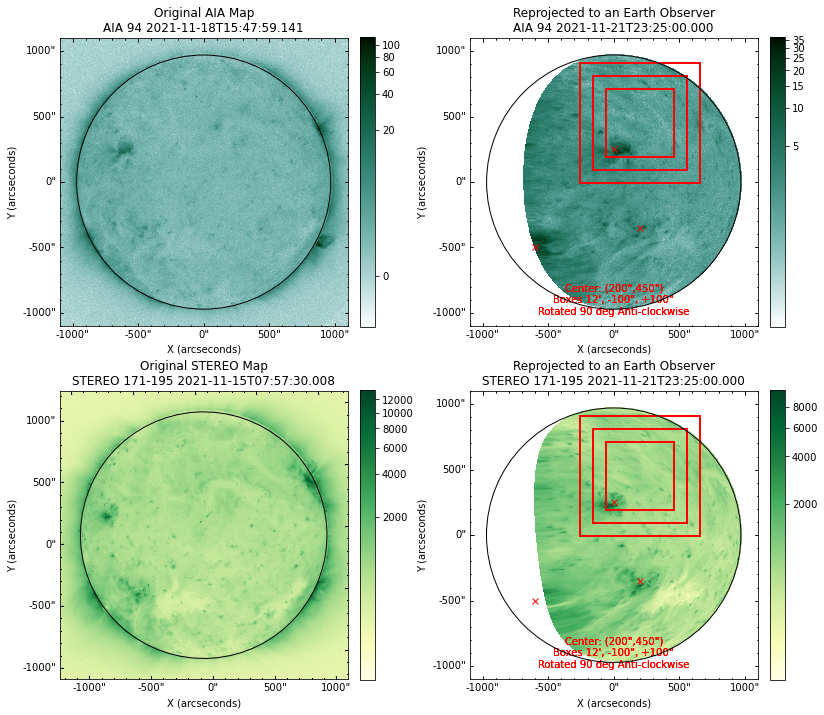

In [3]:
#Nov.21, Orbit 1
t_obs_proj = '2021-11-21T23:25:00' # halfway through first orbit
nustar_center1 = [200,450] # NuSTAR FOV centre in arcsec, [0,0] is sun centre, +West, +North
psp_loc = None # Nans in consensus file

plt.figure(figsize=(13,12))
x_poi21, y_poi21 = [0, 200, -600], [250, -350, -500]  # points of interest, (-600,-500) should be about there
nu_SNangle21 = 90
axes = mp.reprojection(t_obs_proj, *nustar_center1, [-100,0,100], rotate=nu_SNangle21, 
                       markers=[x_poi21, y_poi21], psp_loc=psp_loc)
plt.savefig('./aia_stereo_projection_Nov_21_orbit1.jpg', bbox_inches="tight")
plt.show()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Got STEREO-A map.
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


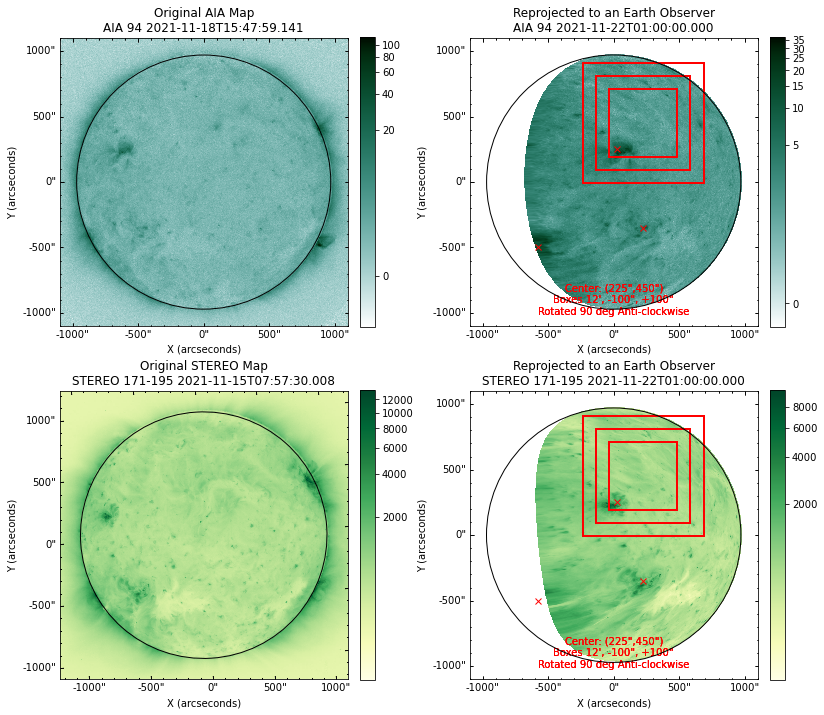

In [4]:
#Nov.21, Orbit 2
t_obs_proj = '2021-11-22T01:00:00' # halfway through middle orbit
nustar_center2 = [225,450] # NuSTAR FOV centre in arcsec, [0,0] is sun centre, +West, +North
psp_loc = None # Nans in consensus file

plt.figure(figsize=(13,12))
x_poi21, y_poi21 = [25, 220, -580], [250, -350, -500]  # points of interest, (-500,-500) should be about there
axes = mp.reprojection(t_obs_proj, *nustar_center2, [-100,0,100], rotate=nu_SNangle21, 
                       markers=[x_poi21, y_poi21], psp_loc=psp_loc)
plt.savefig('./aia_stereo_projection_Nov_21_orbit2.jpg', bbox_inches="tight")
plt.show()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Got AIA map.


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Got STEREO-A map.
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


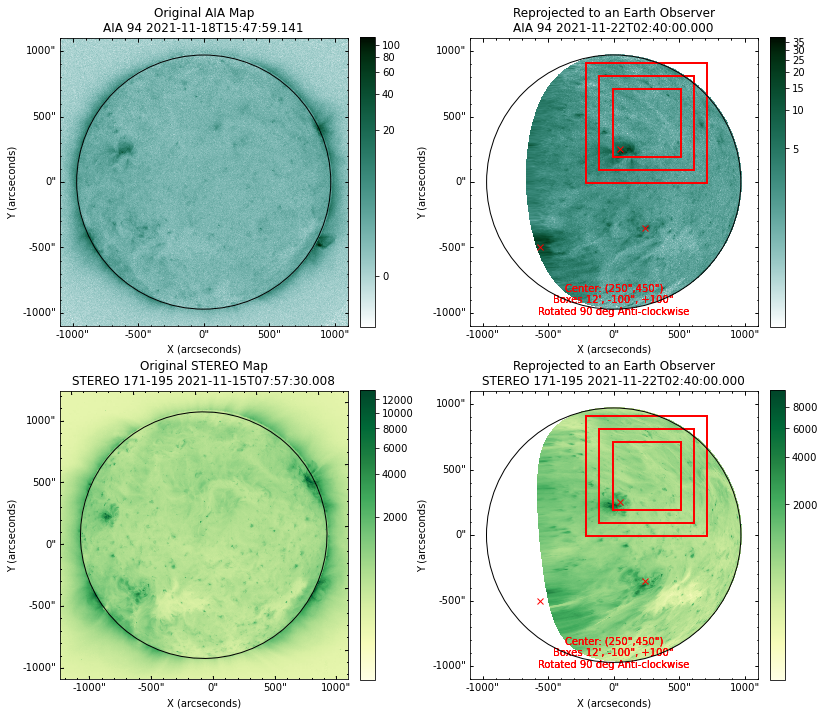

In [5]:
#Nov.21, Orbit 3
t_obs_proj = '2021-11-22T02:40:00' # halfway through last orbit
nustar_center3 = [250,450] # NuSTAR FOV centre in arcsec, [0,0] is sun centre, +West, +North
psp_loc = None # Nans in consensus file

plt.figure(figsize=(13,12))
x_poi21, y_poi21 = [50, 240, -560], [250, -350, -500]  # points of interest, (-500,-500) should be about there
axes = mp.reprojection(t_obs_proj, *nustar_center3, [-100,0,100], rotate=nu_SNangle21, 
                       markers=[x_poi21, y_poi21], psp_loc=psp_loc)
plt.savefig('./aia_stereo_projection_Nov_21_orbit3.jpg', bbox_inches="tight")
plt.show()

***

**Brian's example on NuSTAR solar observation planning (https://github.com/NuSTAR/nustar_pysolar/blob/main/notebooks/Planning_Example.ipynb).**

**I did have to go an manually download the planet ephemeris data file de436.bsp from https://ssd.jpl.nasa.gov/ftp/eph/planets/bsp/ since nustar_pysolar kept timing out with the website. This file is also too large to uplaod to Github.**

You might want to adjust the tstart from above to look over the whole observing period for NuSTAR insterad of just starting at the time the maps are projected onto.

In [9]:
t_obs_starts = ['2021-11-21T22:54:00']
t_obs_durs = [{"hours":5}]
t_obs_ends = [(datetime.datetime.strptime(t_obs_start, "%Y-%m-%dT%H:%M:%S")+datetime.timedelta(**t_obs_dur)).strftime("%Y-%m-%dT%H:%M:%S") for t_obs_start, t_obs_dur in zip(t_obs_starts, t_obs_durs)]

In [10]:
fov_rotations = [nu_SNangle21]
fov_centres = [[nustar_center1, nustar_center2, nustar_center3]]

In [11]:
# Use Brian's planning Notebook: https://github.com/NuSTAR/nustar_pysolar/blob/main/notebooks/Planning_Example.ipynb

for t_obs_start, t_obs_dur, t_obs_end, ang, nustar_centers in zip(t_obs_starts, t_obs_durs, t_obs_ends, fov_rotations, fov_centres):
    # Get occultation period times
    fname = io.download_occultation_times(outdir='./data/')

    # Define observing window
    orbits = planning.sunlight_periods(fname, tstart=t_obs_start, tend=t_obs_end)

    # Calculate the PA angle
    pa = planning.get_nustar_roll(t_obs_start, ang<<u.deg) # angle is anti-clockwise starting with Det0 in top-left
    print("For a \"square\" field of view, use angle=0 / 90 / 180 / 270 to have DET0 at the \nNE (top left) / SE / SW / NW corners of a square field of view.")
    print("NuSTAR Roll angle for anti-clockwise rotation of {} deg from SN @ {}: {}\n".format(ang, t_obs_start, pa))

    # Loop over orbits and find pointing in RA/Dec
    print("\nStarting @ ", t_obs_start)
    for ind, orbit in enumerate(orbits):
        offset = nustar_centers[ind]*u.arcsec
        midTime = (0.5*(orbit[1] - orbit[0]) + orbit[0])
        sky_pos = planning.get_skyfield_position(midTime, offset, load_path='./data', parallax_correction=True)
        print("\nOrbit: {}".format(ind))
        print("Orbit start: {} -> Orbit end: {}".format(orbit[0], orbit[1]))
        print('Aim time: {} RA: {}, Dec: {}\n'.format(midTime, sky_pos[0], sky_pos[1]))
    print("\n\n")

100% [..........................................................] 65879 / 65879For a "square" field of view, use angle=0 / 90 / 180 / 270 to have DET0 at the 
NE (top left) / SE / SW / NW corners of a square field of view.
NuSTAR Roll angle for anti-clockwise rotation of 90 deg from SN @ 2021-11-21T22:54:00: 109.25276967456668 deg


Starting @  2021-11-21T22:54:00
100% [........................................................] 356020 / 356020
Orbit: 0
Orbit start: 2021-11-21T22:55:00.000 -> Orbit end: 2021-11-21T23:57:10.000
Aim time: 2021-11-21T23:26:05.000 RA: 237.36288640524145 deg, Dec: -19.921478831794182 deg

100% [........................................................] 356020 / 356020
Orbit: 1
Orbit start: 2021-11-22T00:31:40.000 -> Orbit end: 2021-11-22T01:33:50.000
Aim time: 2021-11-22T01:02:45.000 RA: 237.42632759652705 deg, Dec: -19.933712956857136 deg

100% [........................................................] 356020 / 356020
Orbit: 2
Orbit start: 2021-11-22T02:08:20

***

***